                                              Solar Energy Anomaly Detection 

Solar Energy anomaly detection is the detection by the use of AI, machine learning and sensor data to identify the deviations from expected solar PV system perfformance. 

It is critical for detecting, in real time failures like the hotspots, module degradation or the inverters' malfunctions to allow for proactive maintenance and ensuring the system readability. 

The solar energy anomaly detection is useful as because :  

1. Proactive Maintenace : identifies the faults before the  they led to total system failures, enabling the repairs that prevents the major costly downtime.  

2. Performance Optimization :  Detects the underperforming  panels or components, ensuring the system opperates at the maximum efficiency.  

3. early Failure Diagonosis : Identifies the issues such as delamination, cracks or hotspots through the thermal imaging, often detecting the problems that are not visible to the naked eye.  

In [94]:
# Importing the libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [95]:
# loading the datset 
solar = pd.read_csv("solar.csv") 
solar 

# Here, as we can see that the solar dataset gets imported 

,timestamp,Bobcat_education_Dylan,Bobcat_education_Alissa,Bobcat_education_Coleman,Bobcat_other_Timothy,Bobcat_office_Justine
0,2016-01-01 00:00:00,0.0,196.6066,0.37,0.02,NaN
1,2016-01-01 01:00:00,0.0,131.0800,0.39,0.01,NaN
2,2016-01-01 02:00:00,0.0,131.0733,0.39,0.02,NaN
3,2016-01-01 03:00:00,0.0,196.6166,0.38,0.02,NaN
4,2016-01-01 04:00:00,0.0,131.0700,0.39,0.00,NaN
...,...,...,...,...,...,...
17539,2017-12-31 19:00:00,0.0,131.0708,0.33,0.01,NaN
17540,2017-12-31 20:00:00,0.0,131.0752,0.41,0.02,NaN
17541,2017-12-31 21:00:00,0.0,131.0676,0.36,0.01,NaN
17542,2017-12-31 22:00:00,0.0,131.0698,0.37,0.02,NaN


In [96]:
print(solar.columns) 

Index(['timestamp', 'Bobcat_education_Dylan', 'Bobcat_education_Alissa',
       'Bobcat_education_Coleman', 'Bobcat_other_Timothy',
       'Bobcat_office_Justine'],
      dtype='object')


In [97]:
# Now we dor the data analysis 
solar.head() 

# The top 5 values are printed 

,timestamp,Bobcat_education_Dylan,Bobcat_education_Alissa,Bobcat_education_Coleman,Bobcat_other_Timothy,Bobcat_office_Justine
0,2016-01-01 00:00:00,0.0,196.6066,0.37,0.02,NaN
1,2016-01-01 01:00:00,0.0,131.0800,0.39,0.01,NaN
2,2016-01-01 02:00:00,0.0,131.0733,0.39,0.02,NaN
3,2016-01-01 03:00:00,0.0,196.6166,0.38,0.02,NaN
4,2016-01-01 04:00:00,0.0,131.0700,0.39,0.00,NaN


In [98]:
solar.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   timestamp                 17544 non-null  object 
 1   Bobcat_education_Dylan    17523 non-null  float64
 2   Bobcat_education_Alissa   17496 non-null  float64
 3   Bobcat_education_Coleman  17521 non-null  float64
 4   Bobcat_other_Timothy      17524 non-null  float64
 5   Bobcat_office_Justine     0 non-null      float64
dtypes: float64(5), object(1)
memory usage: 822.5+ KB


In [99]:
solar.describe()  

# Here, basically the description of the whole data is given here 

,Bobcat_education_Dylan,Bobcat_education_Alissa,Bobcat_education_Coleman,Bobcat_other_Timothy,Bobcat_office_Justine
count,17523.000000,17496.000000,17521.000000,17524.000000,0.0
mean,5.576325,75.234758,2.989169,3.377411,NaN
std,9.396865,97.348083,5.044684,10.645168,NaN
min,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.000000,0.050000,0.010000,NaN
50%,0.040000,0.000000,0.380000,0.020000,NaN
75%,8.130000,131.080000,3.300000,5.380000,NaN
max,359.336600,2359.290100,29.280000,1229.133000,NaN


In [100]:
# printing the shape of the dataset 
solar.shape 

# It prints the rows and columns of the dataset. 

(17544, 6)

Now, comes the step of handling the missing values as its an important part of the data preprocessing 

In [101]:
solar.fillna(method= "ffill", inplace =True) 
solar.fillna(method = "bfill", inplace = True) 

solar 

C:\Users\91981\AppData\Local\Temp\ipykernel_27064\3402199389.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  solar.fillna(method= "ffill", inplace =True)
C:\Users\91981\AppData\Local\Temp\ipykernel_27064\3402199389.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  solar.fillna(method = "bfill", inplace = True)


,timestamp,Bobcat_education_Dylan,Bobcat_education_Alissa,Bobcat_education_Coleman,Bobcat_other_Timothy,Bobcat_office_Justine
0,2016-01-01 00:00:00,0.0,196.6066,0.37,0.02,NaN
1,2016-01-01 01:00:00,0.0,131.0800,0.39,0.01,NaN
2,2016-01-01 02:00:00,0.0,131.0733,0.39,0.02,NaN
3,2016-01-01 03:00:00,0.0,196.6166,0.38,0.02,NaN
4,2016-01-01 04:00:00,0.0,131.0700,0.39,0.00,NaN
...,...,...,...,...,...,...
17539,2017-12-31 19:00:00,0.0,131.0708,0.33,0.01,NaN
17540,2017-12-31 20:00:00,0.0,131.0752,0.41,0.02,NaN
17541,2017-12-31 21:00:00,0.0,131.0676,0.36,0.01,NaN
17542,2017-12-31 22:00:00,0.0,131.0698,0.37,0.02,NaN


In [102]:
# Now, comes the part of dropping the duplicate parts 

solar = solar.drop_duplicates() 
solar 

,timestamp,Bobcat_education_Dylan,Bobcat_education_Alissa,Bobcat_education_Coleman,Bobcat_other_Timothy,Bobcat_office_Justine
0,2016-01-01 00:00:00,0.0,196.6066,0.37,0.02,NaN
1,2016-01-01 01:00:00,0.0,131.0800,0.39,0.01,NaN
2,2016-01-01 02:00:00,0.0,131.0733,0.39,0.02,NaN
3,2016-01-01 03:00:00,0.0,196.6166,0.38,0.02,NaN
4,2016-01-01 04:00:00,0.0,131.0700,0.39,0.00,NaN
...,...,...,...,...,...,...
17539,2017-12-31 19:00:00,0.0,131.0708,0.33,0.01,NaN
17540,2017-12-31 20:00:00,0.0,131.0752,0.41,0.02,NaN
17541,2017-12-31 21:00:00,0.0,131.0676,0.36,0.01,NaN
17542,2017-12-31 22:00:00,0.0,131.0698,0.37,0.02,NaN


Now, comes an important part of the selection of the numerical columns from the whole dataset, as the anomaly detection happens only on the numerical data and hence this proves to be an important step. 

In [103]:
num_data = solar.select_dtypes(include = [np.number])  
num_data

,Bobcat_education_Dylan,Bobcat_education_Alissa,Bobcat_education_Coleman,Bobcat_other_Timothy,Bobcat_office_Justine
0,0.0,196.6066,0.37,0.02,NaN
1,0.0,131.0800,0.39,0.01,NaN
2,0.0,131.0733,0.39,0.02,NaN
3,0.0,196.6166,0.38,0.02,NaN
4,0.0,131.0700,0.39,0.00,NaN
...,...,...,...,...,...
17539,0.0,131.0708,0.33,0.01,NaN
17540,0.0,131.0752,0.41,0.02,NaN
17541,0.0,131.0676,0.36,0.01,NaN
17542,0.0,131.0698,0.37,0.02,NaN


Here, basically the above step has been done to remove the time stamp column as because it is not invloved in the anomaly detection of the pproject and hence, it needs to be taken care of. 

In [104]:
# Now, comes the important part of the scaling of the data 
from sklearn.preprocessing import StandardScaler 

sc= StandardScaler() 

scaled_data = sc.fit_transform(num_data) 

scaled_data = np.nan_to_num(num_data) 

# Here, the data has been scaled properly and the analysis has been done  

c:\Users\91981\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\extmath.py:1144: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\91981\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\extmath.py:1149: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\91981\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\extmath.py:1169: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


# Use of different models 

1. Isolation Forest : Detects anomalies by detecting the rare points 

2. LOF : It compares a data with its neighbors. 

3. Robust Covariance : It is much less dense than nearby points leading to anomaly. 

Now, we will be applying the anomaly detection models to carry out the further analysis of the datasets. 

In [105]:
# implementing the ML models  

from sklearn.ensemble import IsolationForest 
from sklearn.neighbors import LocalOutlierFactor 
from sklearn.covariance import EllipticEnvelope 

In [106]:
iso = IsolationForest(contamination = 0.05, random_state = 42)
iso 

,n_estimators,100
,max_samples,'auto'
,contamination,0.05
,max_features,1.0
,bootstrap,False
,n_jobs,None
,random_state,42
,verbose,0
,warm_start,False


In [107]:
solar_isopred = iso.fit_predict (scaled_data) 

solar_isopred = np.where(solar_isopred == -1,1,0) 

solar_isopred  

# The prediction in the form of array has been made by the isolation Forest Model 

array([0, 0, 0, ..., 0, 0, 0], shape=(17544,))

In [108]:
# Now, comes using the Local Outlier Factor Algorithm   


lof = LocalOutlierFactor(n_neighbors = 20, contamination =0.05) 
lof 

,n_neighbors,20
,algorithm,'auto'
,leaf_size,30
,metric,'minkowski'
,p,2
,metric_params,None
,contamination,0.05
,novelty,False
,n_jobs,None


In [109]:
solar_lofpred = lof.fit_predict (scaled_data) 

solar_lofpred  = np.where(solar_lofpred == -1,1,0) 

solar_lofpred  

c:\Users\91981\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


array([1, 0, 0, ..., 0, 0, 0], shape=(17544,))

In [110]:
# Now, we will carry out the Robust Covariaancce method.   

rc = EllipticEnvelope(contamination=0.05) 
rc  

,store_precision,True
,assume_centered,False
,support_fraction,None
,contamination,0.05
,random_state,None


In [111]:
solar_rcpred = rc.fit_predict(scaled_data) 

solar_rcpred = np.where(solar_lofpred == -1,1,0) 

solar_lofpred 

c:\Users\91981\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\covariance\_robust_covariance.py:753: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


array([1, 0, 0, ..., 0, 0, 0], shape=(17544,))

Now, comes the part of the combination oof the anomaly of the anomaly results. 


In [118]:
results =  pd.DataFrame({
    "Islation Forest" : solar_isopred, 
    "LOF" : solar_lofpred, 
    "RC" :  solar_rcpred
}) 

results["Final Anomaly"] = (results.sum(axis =1) >= 2).astype(int) 

results 

,Islation Forest,LOF,RC,Final Anomaly
0,0,1,0,0
1,0,0,0,0
2,0,0,0,0
3,0,1,0,0
4,0,0,0,0
...,...,...,...,...
17539,0,0,0,0
17540,0,0,0,0
17541,0,0,0,0
17542,0,0,0,0


In [119]:
# Attaching the result to the original data 

solar_result = solar.copy() 

solar_result["Final Anomaly"] = results["Final Anomaly"] 

solar_result 

,timestamp,Bobcat_education_Dylan,Bobcat_education_Alissa,Bobcat_education_Coleman,Bobcat_other_Timothy,Bobcat_office_Justine,Final Anomaly
0,2016-01-01 00:00:00,0.0,196.6066,0.37,0.02,NaN,0
1,2016-01-01 01:00:00,0.0,131.0800,0.39,0.01,NaN,0
2,2016-01-01 02:00:00,0.0,131.0733,0.39,0.02,NaN,0
3,2016-01-01 03:00:00,0.0,196.6166,0.38,0.02,NaN,0
4,2016-01-01 04:00:00,0.0,131.0700,0.39,0.00,NaN,0
...,...,...,...,...,...,...,...
17539,2017-12-31 19:00:00,0.0,131.0708,0.33,0.01,NaN,0
17540,2017-12-31 20:00:00,0.0,131.0752,0.41,0.02,NaN,0
17541,2017-12-31 21:00:00,0.0,131.0676,0.36,0.01,NaN,0
17542,2017-12-31 22:00:00,0.0,131.0698,0.37,0.02,NaN,0


In [ ]:
# Prinntig the anomaly counts 

print("Anomaly Couts: ") 
print(results["Final Anomaly"].value_counts())  

# There are around 27 anomalies 

Anomaly Couts: 
Final Anomaly
0    17517
1       27
Name: count, dtype: int64


# Plotting of the combined plot   

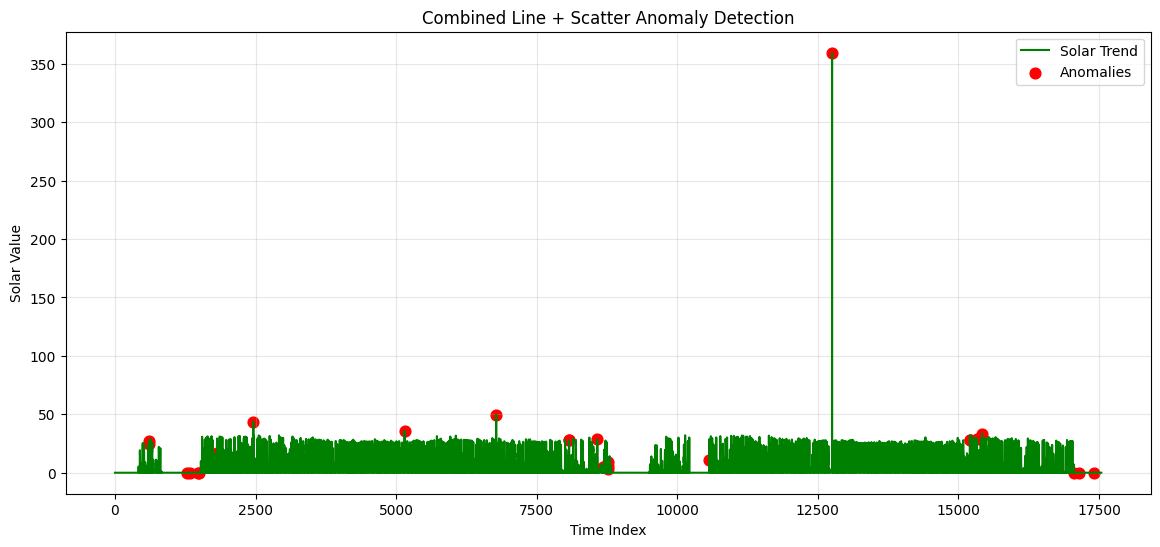

In [131]:
plt.figure(figsize=(14,6))

# Step 1 — Plot line for full data
plt.plot(
    solar.index,
    num_data.iloc[:,0],
    color="green",
    label="Solar Trend",
    linewidth=1.5
)

# Step 2 — Highlight anomalies
anomalies = solar[solar_result["Final Anomaly"] == 1]

plt.scatter(
    anomalies.index,
    anomalies[num_data.columns[0]],
    color="red",
    s=60,
    label="Anomalies"
)

plt.title("Combined Line + Scatter Anomaly Detection")
plt.xlabel("Time Index")
plt.ylabel("Solar Value")
plt.legend()
plt.grid(alpha=0.3)

plt.show()


# Graph Explanation  

So, here the graph is plotted and hence we can see that the plot is there for plotting the Electricity Time Series Anomaly Detection. The graph basically plots where something unusual happened.  

The green line basically explains the total usage and the red point basically tell us the anomaly detection in the whole dataset of the Solar Time Series Detection. 

In [133]:
# Now, we will try for the data saving of the results we have achieve 

solar_result.to_csv("Solar_anomaly_results.csv", index=False)

print("\n✅ DONE! Results saved.") 



✅ DONE! Results saved.


In [134]:
# We will also save the results of the Electricity Anomaly Model  

results.to_csv("Solar_Energy_Anomaly_Model_Results.csv", index = False) 

print("\n✅ DONE! Results saved.")


✅ DONE! Results saved.
